In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import csv

### Separar imágenes que están en el csv y las que no

In [2]:
'''
names = data['NAME'].unique()
images_path = ("..\Datasets\mpii_human_pose\human_pose_images")
count = 0
for name in names:
    source_path = images_path + "\\" + name
    category = np.array(data.loc[data['NAME'] == name, 'Category'])[0]
    destination_path = images_path + "\\" + "in_csv" + "\\" + name
    
    if os.path.isfile(source_path):
        os.rename(source_path, destination_path)
    count += 1
    if count % 250 == 0:
        print(count)

print(count)
''';

In [3]:
data = pd.read_csv('mpii_dataset_clean_v2.csv')
data

,NAME,Activity,Category
0,015601864.jpg,curling,sports
1,015599452.jpg,curling,sports
2,005808361.jpg,curling,sports
3,086617615.jpg,curling,sports
4,060111501.jpg,curling,sports
...,...,...,...
17367,033474347.jpg,pushing car,transportation
17368,082650067.jpg,pushing car,transportation
17369,072772110.jpg,pushing car,transportation
17370,039361034.jpg,pushing car,transportation


In [4]:
data.Category.unique()

array(['sports', 'inactivity quiet-light', 'miscellaneous', 'occupation',
       'water activities', 'home activities', 'lawn and garden',
       'religious activities', 'winter activities',
       'conditioning exercise', 'bicycling', 'fishing and hunting',
       'dancing', 'walking', 'running', 'self care', 'home repair',
       'music playing', 'transportation', 'volunteer activities'],
      dtype=object)

In [5]:
print(data.isnull().values.any())
print(data['Activity'].unique().shape)
print(data['Category'].unique().shape)
print(data['Activity'].unique())

False
(396,)
(20,)
['curling' 'sitting quietly'
 'sitting, talking in person, on the phone, computer, or text messaging, light effort'
 'truck driving, loading and unloading truck, tying down load, standing, walking and carrying heavy lo'
 'swimming, synchronized' 'scrubbing floors'
 'mopping, standing, light effort'
 'chambermaid, hotel housekeeper, making bed, cleaning bathroom, pushing cart'
 'cleaning, general'
 'implied walkingstanding - picking up yard, light, picking flowers or vegetables'
 'gardening, general, moderate effort' 'standing, talking in person'
 'standing, miscellaneous' 'lawn bowling, bocce ball, outdoor'
 'serving food in church' 'skiing, downhill' 'skiing, cross-country'
 'skiing, climbing up'
 'horse grooming, feeding, cleaning, harnessing and unharnessing'
 'horse cart, driving, standing or sitting'
 'video exercise workouts, TV conditioning programs' 'bicycling, general'
 'hacky sack' 'shoveling snow, by hand' 'fishing, general' 'ironing'
 'ballroom' 'therapeu

### Rescalar imágenes a 256x256 (por si acaso) YA HECHO

In [6]:
'''
from PIL import Image
import os, sys

path = ('..\Datasets\mpii_human_pose\human_pose_images')
dirs = os.listdir(path)
outpath  = (r'..\Datasets\mpii_human_pose\resized_images' + '\\')
count = 0
for item in dirs:
    count += 1
    obj = path + '\\' + item
    if os.path.isfile(obj):
        im = Image.open(obj)
        f, e = os.path.splitext(item)
        imResize = im.resize((256, 256), Image.ANTIALIAS)
        imResize.save(outpath + '\\' + f + '.jpeg', 'JPEG', quality=90)
        if count % 100 == 0:
            print(count)
            ''';

### Separar imágenes y datos para entrenamiento y test

In [7]:
x = data.drop('Category', axis=1)
y = data['Category']

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, 
                                                 test_size = 0.20, random_state = 2)
x_train

,NAME,Activity
230,069597421.jpg,"sitting, talking in person, on the phone, comp..."
2141,073872315.jpg,"standing, arts and crafts, sand painting, carv..."
15789,058772539.jpg,"eating, sitting"
2386,069963957.jpg,"rowing, stationary"
10744,061143424.jpg,"bicycling, stationary"
...,...,...
14696,006110708.jpg,ballroom
1099,039090600.jpg,"irrigation channels, opening and closing ports"
11798,073432341.jpg,"water aerobics, water calisthenics"
6637,093874989.jpg,soccer


**Repartir las imágenes en carpeta 'train' y carpeta 'test'. Esto solo se hace una vez puesto que el random_state = 2 hace que los datos siempre se repartan de igual manera entre train y test**


In [9]:
'''
names_train = x_train['NAME'].unique()
names_test = x_test['NAME'].unique()

names = np.concatenate((names_train, names_test), axis=0)

images_path = ("..\Datasets\mpii_human_pose\human_pose_images")
count = 0
for name in names:
    source_path = images_path + "\\" + name
    if name in names_train:
        folder = 'train'
    elif name in names_test:
        folder = 'test'
        
    destination_path = images_path + "\\" + folder + "\\" + name
    
    if os.path.isfile(source_path):
        os.rename(source_path, destination_path)
    count += 1
    if count % 250 == 0:
        print(count)

print(count)
''';

**Repartir las imágenes en carpetas-categoría**

In [10]:
'''
# Repartir imágenes en carpetas-categorías

names_train = x_train['NAME'].unique()
names_test = x_test['NAME'].unique()

names = np.concatenate((names_train, names_test), axis=0)

images_path = ("..\Datasets\mpii_human_pose\human_pose_images")
train_dir = os.path.join(images_path, "train")
test_dir =  os.path.join(images_path, "test")

categories = np.array(data['Category'].unique())

# Crear carpetas para categorías
#for category in categories:
#    os.mkdir(os.path.join(train_dir, category))
#    os.mkdir(os.path.join(test_dir, category))

count = 0
for name in names:
    category_image = np.array(data[data['NAME'] == name].Category)[0]

    if name in names_train:
        folder = 'train'
    elif name in names_test:
        folder = 'test'      
        
    source_path = os.path.join(images_path, folder, name)
    destination_path = os.path.join(images_path, folder, category_image, name)

    if os.path.isfile(source_path):
        os.rename(source_path, destination_path)
        
    count += 1
    if count % 250 == 0:
        print(count)
''';

# Modelo Red Neuronal Convolucional

In [11]:
import tensorflow as tf

In [12]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(200, (3,3), activation='relu', input_shape=(150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(250, (3,3), activation='relu'),  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(300, (3,3), activation='relu'),  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(300, (3,3), activation='relu'),  
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten layer
    tf.keras.layers.Dropout(0.3), 
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    # Output layer
    tf.keras.layers.Dense(20, activation='softmax')    
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 200)     5600      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 250)       450250    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 250)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 300)       675300    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 300)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 120)       3

In [14]:
from tensorflow.keras.optimizers import RMSprop

SGD_opt = tf.keras.optimizers.SGD(learning_rate=0.01, 
                                  momentum=0.9)

model.compile(optimizer = SGD_opt, #SGD con momentum (sin SGD estoy encontrando puntos de silla)
              loss = 'categorical_crossentropy', # Probar 'sparse_categorical_crossentropy'
              metrics=['accuracy'])

In [15]:
images_path = ("..\Datasets\mpii_human_pose\human_pose_images")
train_dir = os.path.join(images_path, "train")
test_dir =  os.path.join(images_path, "test")

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255.0,         # Hacer Data augmentation
                                   #featurewise_center = True,
                                   #featurewise_std_normalization = True,
                                   rotation_range = 20,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.1,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.0)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20,
                                                    class_mode = 'categorical', 
                                                    target_size =(150,150))

test_generator = test_datagen.flow_from_directory(test_dir, batch_size = 20,
                                                 class_mode = 'categorical', 
                                                  target_size = (150,150))

Found 13897 images belonging to 20 classes.
Found 3475 images belonging to 20 classes.


In [17]:
history = model.fit(train_generator, validation_data = test_generator,
                    #steps_per_epoch = 1200, 
                    epochs = 100, # epochs a 100
                    #validation_steps = 50, 
                    verbose = 1)

Epoch 1/100
695/695 [==============================] - 2525s 4s/step - loss: 2.6158 - accuracy: 0.1928 - val_loss: 2.6120 - val_accuracy: 0.1928
Epoch 2/100
695/695 [==============================] - 2402s 3s/step - loss: 2.5317 - accuracy: 0.2036 - val_loss: 2.6093 - val_accuracy: 0.1882
Epoch 3/100
695/695 [==============================] - 2330s 3s/step - loss: 2.4847 - accuracy: 0.2211 - val_loss: 2.4351 - val_accuracy: 0.2423
Epoch 4/100
695/695 [==============================] - 2379s 3s/step - loss: 2.4320 - accuracy: 0.2343 - val_loss: 2.3963 - val_accuracy: 0.2483
Epoch 5/100
695/695 [==============================] - 2357s 3s/step - loss: 2.3624 - accuracy: 0.2491 - val_loss: 2.3086 - val_accuracy: 0.2558
Epoch 6/100
695/695 [==============================] - 2314s 3s/step - loss: 2.3024 - accuracy: 0.2693 - val_loss: 2.2855 - val_accuracy: 0.2745
Epoch 7/100
695/695 [==============================] - 2297s 3s/step - loss: 2.2464 - accuracy: 0.2893 - val_loss: 2.2499 - val_ac

In [18]:
model.save(r"saved\CNN_Filtros++.h5")

In [19]:
model.evaluate(test_generator)  #REDUNDANTE. Ya se hace durante el entrenamiento (fase final por epoch)

174/174 [==============================] - 181s 1s/step - loss: 1.6365 - accuracy: 0.5335


[1.6365262269973755, 0.5335251688957214]

### Testing save and load model

In [20]:
model_from_file = tf.keras.models.load_model('saved/CNN_Filtros++.h5')

In [21]:
model_from_file.evaluate(test_generator)

174/174 [==============================] - 181s 1s/step - loss: 1.6365 - accuracy: 0.5335


[1.6365269422531128, 0.5335251688957214]

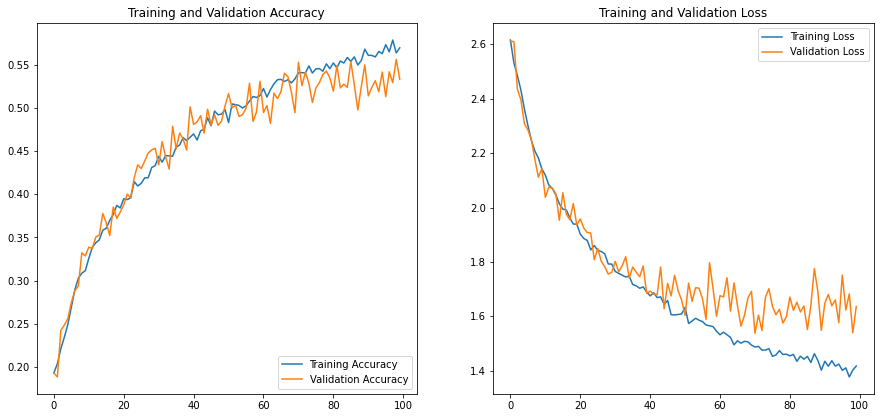

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Evaluar modelo con imagen random

In [51]:
# Escribir email a Roberto para ver cómo pasar imágenes a la red para evaluarla
'''from tensorflow.keras.preprocessing import image

imgpath = 'fut1.jpg'
imagen = image.load_img(imgpath, target_size=(256,256))

w = image.img_to_array(imagen)
w = np.expand_dims(x, axis=0)   # Mirar documentación de la función
w = np.expand_dims(x, axis=0)
imagenes = np.vstack([w])

classes = model.predict(w, batch_size=20)

print(classes[0])'''

ValueError: in user code:

    C:\Users\navar\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\navar\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\navar\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\navar\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\navar\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\navar\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\navar\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\navar\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\navar\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: [None, 256, 3]
